# Visualizing Time Series Data - Lab

## Introduction

As mentioned in an earlier lesson, time series visualizations play an important role in the analysis of time series data. Time series are often plotted to allow data diagnostics to identify temporal structures. 

In this lab, we'll cover main techniques for visualizing time series data in Python using the minimum daily temperatures over 10 years (1981-1990) in the city of Melbourne, Australia. The units are in degrees Celsius and there are 3,650 observations. The [source](https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990) of the data is credited to the Australian Bureau of Meteorology.

## Objectives

You will be able to:

- Explore the temporal structure of time series with line plots 
- Construct and interpret time series histogram and density plots 
- Create a time series heat map

## Let's get started! 

Run the cell below to import the necessary classes and libraries: 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

- Import the dataset which is available in `'min_temp.csv'` 
- Print the first five rows of the data 

In [2]:
# Load the data from 'min_temp.csv'
temp_data = pd.read_csv('min_temp.csv')

# Print the first five rows
temp_data.head()

,Date,Daily_min
0,1/1/81,20.7
1,2/1/81,17.9
2,3/1/81,18.8
3,4/1/81,14.6
4,5/1/81,15.8


- Make sure the `'Date'` column is treated as an actual date by Python (notice how the date is formatted before attempting to changing the data type) 
- Set the index of `temp_data` to this `'Date'` column 

In [3]:
if isinstance(temp_data.index, pd.DatetimeIndex):
    print('its fine')
else:
    print('change it')


change it


In [4]:
# Change the data type of the 'Date' column


# Set the index to the 'Date' column


##### from previous lab, loop checks formate and changes if needed
if isinstance(temp_data.index, pd.DatetimeIndex):
    temp_data.index.name = 'Date'
else:
    # Convert `Date` to a datetime column
    temp_data['Date'] = pd.to_datetime(temp_data['Date'], format='%d/%m/%y')
    # Make `Date` the index 
    temp_data.set_index('Date', inplace=True)
    
temp_data.head()

,Daily_min
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Print the index of `temp_data`. 

In [5]:
# Print the index of the data
temp_data.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

## Time Series line plot

Create a time series line plot for `temp_data`

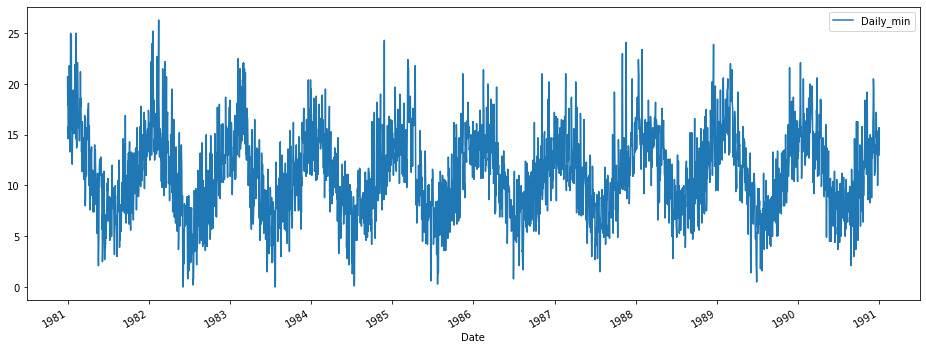

In [6]:
# Draw a line plot using temp_data 
temp_data.plot(figsize = (16,6));

Some distinguishable patterns appear when we plot the data. Here we can see a pattern in our time series, i.e., temperature values are maximum at the beginning of each year and minimum at around the 6th month. Yes, we are talking about Australia here so this is normal. This cyclical pattern is known as seasonality and will be covered in later labs. 

## Time Series dot plot

For a dense time series, as seen above, you may want to change the style of a line plot for a more refined visualization with a higher resolution of events. One way could be to change the continuous line to dots, each representing one entry in the time series. 

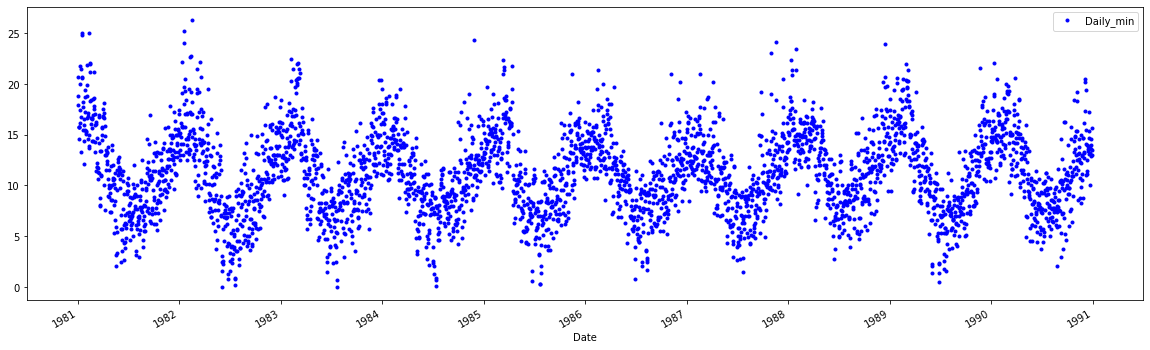

In [7]:
# Use dots instead on a continuous line and redraw the time series 
temp_data.plot(figsize = (20,6), style = '.b');

This plot helps us identify clear outliers in certain years!

## Grouping and Visualizing time series data

Now, let's group the data by year and create a line plot for each *year* for direct comparison. You can regroup data per year using Pandas' `grouper()` function in conjunction with the `.groupby()` method.  

In [8]:
# Use pandas grouper to group values using annual frequency
year_groups = temp_data.groupby(pd.Grouper(freq ='A'))
year_groups

Rearrange the data so you can create subplots for each year. 

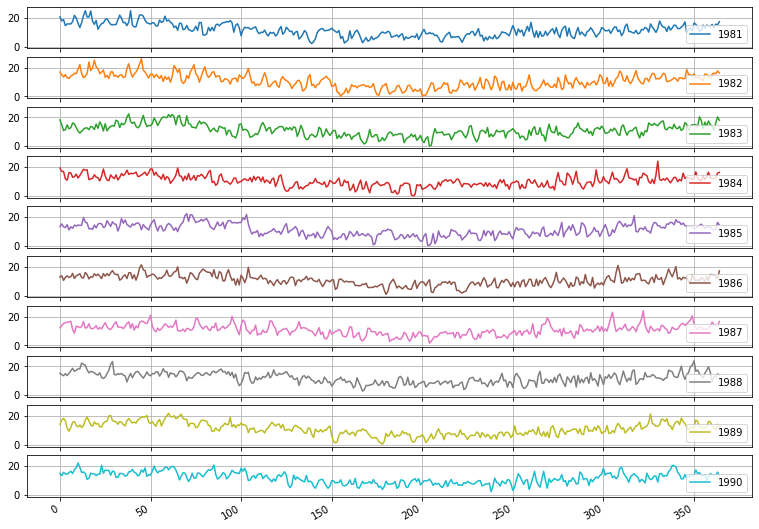

In [9]:
# Create a new DataFrame and store yearly values in columns 
temp_annual = pd.DataFrame()

for yr, group in year_groups:
    temp_annual[yr.year] = group.values.ravel()

# Plot the yearly groups as subplots
temp_annual.plot(figsize = (13,10), subplots=True, legend=True, sharey=True, grid=True,)

# fix legend location to bottom right
for ax in plt.gcf().axes:
    ax.legend(loc=4);

You can see 10 subplots corresponding to the number of columns in your new DataFrame. Each plot is 365 days in length following the annual frequency.

Now, plot all the years on the same graph instead of different subplots. 

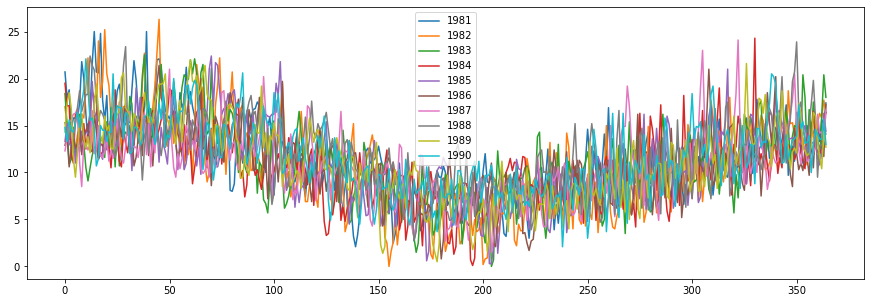

In [10]:
# Plot all years on the same graph
temp_annual.plot(figsize = (15,5), subplots=False, legend=True);

We can see in both plots above that due to the dense nature of time-series (365 values) and a high correlation between the values in different years (i.e. similar temperature values for each year), we can not clearly identify any differences in these groups. However, if you try this on the CO2 dataset used in the last lab, you should be able to see a clear trend showing an increase every year. 

## Time Series Histogram

Create a histogram for your data.

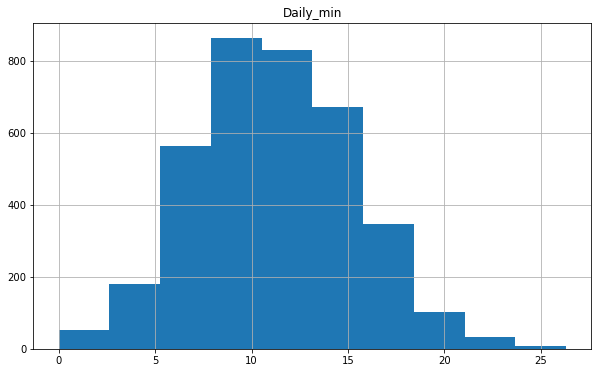

In [11]:
# Plot a histogram of the temperature dataset
temp_data.hist(figsize = (10,6));

The plot shows a distribution that looks strongly Gaussian/Normal. 


## Time Series Density Plots

Create a time series density plot

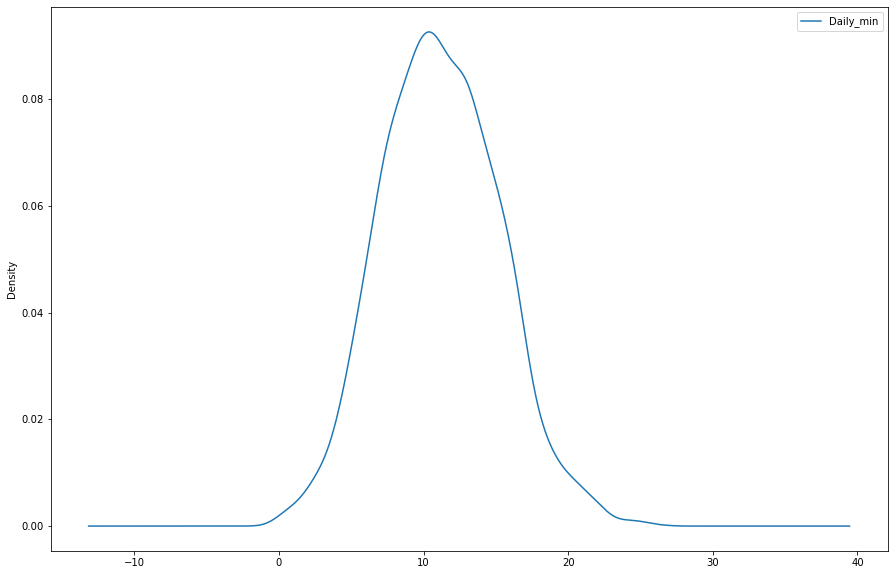

In [12]:
# Plot a density plot for temperature dataset
temp_data.plot(kind='kde', figsize = (15,10));

The density plot provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian.

## Time Series Box and Whisker Plots by Interval

Let's use our groups by years to plot a box and whisker plot for each year for direct comparison using the `.boxplot()` method. 

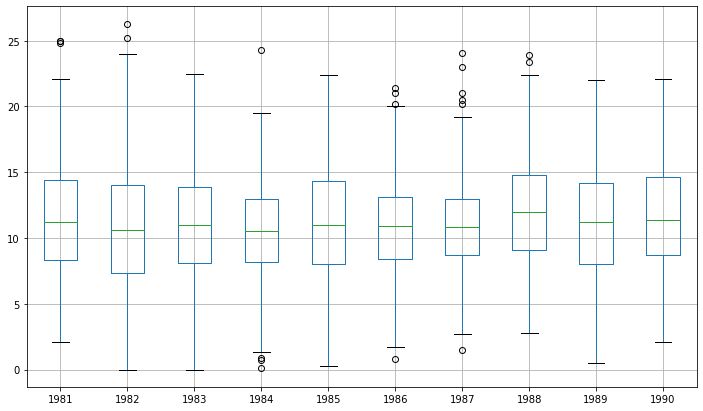

In [13]:
# Generate a box and whiskers plot for temp_annual
temp_annual.boxplot(figsize = (12,7));

In our plot above, we don't see much difference in the mean temperature over years, however, we can spot some outliers showing extremely cold or hot days. 

We can also plot distribution across months within each year. Perform the following tasks to achieve this: 

- Extract observations for the year 1990 only, the last year in the dataset 
- Group observations by month, and add each month to a new DataFrame as a column 
- Create 12 box and whisker plots, one for each month of 1990 

In [15]:
# Use temp_data to extract values for 1990
yr_1990 = temp_data['1990']

# Group observations by month
groups_monthly = yr_1990.groupby(pd.Grouper(freq ='M'))


##### FROM SB #####
# Add each month to DataFrame as a column
months_1990 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)
months_df = pd.DataFrame(months_1990)
#####


# Set the column names for each month i.e. 1,2,3, .., 12
months_df.columns = range(1,13)

In [16]:
months_df

,1,2,3,4,5,6,7,8,9,10,11,12
0,14.8,12.0,19.3,15.3,13.0,9.7,7.4,6.8,6.0,11.3,15.4,13.3
1,13.3,12.2,17.3,14.7,13.9,8.2,7.3,9.8,9.5,10.5,11.8,13.2
2,15.6,14.8,19.0,11.0,12.6,8.4,7.7,5.7,8.6,9.9,13.0,16.2
3,14.5,14.8,19.8,12.2,14.3,8.5,7.7,8.6,7.6,11.0,11.1,17.3
4,14.3,14.4,19.3,14.2,16.0,10.4,9.3,10.6,10.4,14.0,12.5,20.5
5,15.3,12.9,17.2,17.0,13.3,6.8,4.4,7.8,10.3,9.2,18.3,20.2
6,16.4,13.4,14.2,15.8,7.0,6.0,5.7,7.7,7.5,9.8,19.2,19.4
7,14.8,15.9,10.3,15.2,4.9,6.6,10.2,8.6,3.0,6.0,15.4,15.5
8,17.4,16.1,13.0,15.1,6.9,7.8,10.2,6.5,5.3,9.8,13.1,14.1
9,18.8,17.6,15.3,14.7,13.7,10.3,9.3,6.9,10.5,9.2,11.5,11.0


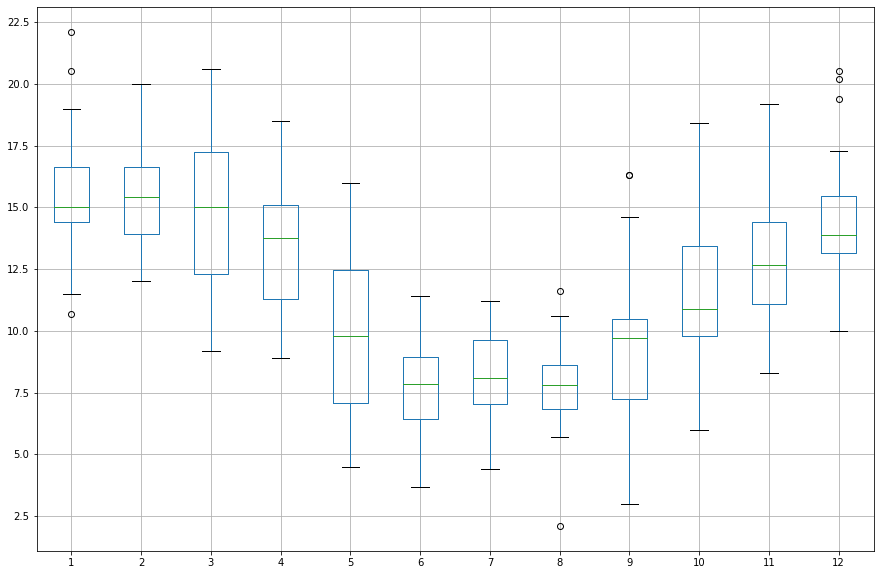

In [17]:
# Plot the box and whiskers plot for each month 
months_df.boxplot(figsize = (15,10))
plt.show()

In [ ]:
##### checking what is going on
display([pd.DataFrame(x[1].values) for x in groups_monthly])

In [18]:
# alt way of constructing df
month_as_int = 1
for thing in groups_monthly:
    if month_as_int == 1:
        month_df = pd.DataFrame(thing[1].values, columns=[month_as_int])
        month_as_int+=1
    else:
        month_df[month_as_int]=pd.DataFrame(thing[1].values)
        month_as_int+=1
        
month_df

[       0
 0   14.8
 1   13.3
 2   15.6
 3   14.5
 4   14.3
 5   15.3
 6   16.4
 7   14.8
 8   17.4
 9   18.8
 10  22.1
 11  19.0
 12  15.5
 13  15.8
 14  14.7
 15  10.7
 16  11.5
 17  15.0
 18  14.5
 19  14.5
 20  13.3
 21  14.3
 22  14.3
 23  20.5
 24  15.0
 25  17.1
 26  16.9
 27  16.9
 28  13.6
 29  16.4
 30  16.1,
        0
 0   12.0
 1   12.2
 2   14.8
 3   14.8
 4   14.4
 5   12.9
 6   13.4
 7   15.9
 8   16.1
 9   17.6
 10  15.6
 11  15.0
 12  13.0
 13  14.1
 14  17.3
 15  15.7
 16  18.6
 17  12.7
 18  14.0
 19  13.7
 20  16.3
 21  20.0
 22  17.0
 23  15.2
 24  16.5
 25  16.5
 26  17.3
 27  19.1,
        0
 0   19.3
 1   17.3
 2   19.0
 3   19.8
 4   19.3
 5   17.2
 6   14.2
 7   10.3
 8   13.0
 9   15.3
 10  15.0
 11  12.1
 12   9.2
 13  11.0
 14  15.0
 15  11.6
 16  11.6
 17  15.1
 18  15.0
 19  13.6
 20  12.5
 21  14.3
 22  16.0
 23  17.4
 24  16.9
 25  18.0
 26  20.6
 27  14.2
 28  10.9
 29  11.9
 30  13.3,
        0
 0   15.3
 1   14.7
 2   11.0
 3   12.2
 4   14.2
 5   17

,1,2,3,4,5,6,7,8,9,10,11,12
0,14.8,12.0,19.3,15.3,13.0,9.7,7.4,6.8,6.0,11.3,15.4,13.3
1,13.3,12.2,17.3,14.7,13.9,8.2,7.3,9.8,9.5,10.5,11.8,13.2
2,15.6,14.8,19.0,11.0,12.6,8.4,7.7,5.7,8.6,9.9,13.0,16.2
3,14.5,14.8,19.8,12.2,14.3,8.5,7.7,8.6,7.6,11.0,11.1,17.3
4,14.3,14.4,19.3,14.2,16.0,10.4,9.3,10.6,10.4,14.0,12.5,20.5
5,15.3,12.9,17.2,17.0,13.3,6.8,4.4,7.8,10.3,9.2,18.3,20.2
6,16.4,13.4,14.2,15.8,7.0,6.0,5.7,7.7,7.5,9.8,19.2,19.4
7,14.8,15.9,10.3,15.2,4.9,6.6,10.2,8.6,3.0,6.0,15.4,15.5
8,17.4,16.1,13.0,15.1,6.9,7.8,10.2,6.5,5.3,9.8,13.1,14.1
9,18.8,17.6,15.3,14.7,13.7,10.3,9.3,6.9,10.5,9.2,11.5,11.0


We see 12 box and whisker plots, showing the significant change in the distribution of minimum temperatures across the months of the year from the Southern Hemisphere summer in January to the Southern Hemisphere winter in the middle of the year, and back to summer again.

## Time Series Heat Maps

Let's create a heat map of the minimum daily temperatures data. 

- Rotate (transpose) the `temp_annual` DataFrame so that each row represents one year and each column one day  
- Use the `matshow()` function to draw a heat map for transposed yearly matrix 

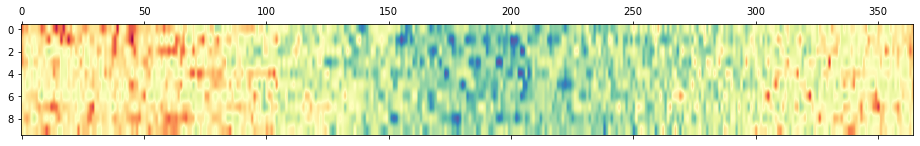

In [20]:
# Transpose the yearly group DataFrame
year_matrix = temp_annual.T

# Draw a heatmap with matshow()
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

We can now see that the plot shows the cooler minimum temperatures in the middle days of the years and the warmer minimum temperatures in the start and ends of the years, and all the fading and complexity in between.

Following this intuition, let's draw another heatmap comparing the months of the year in 1990. Each column represents one month, with rows representing the days of the month from 1 to 31.

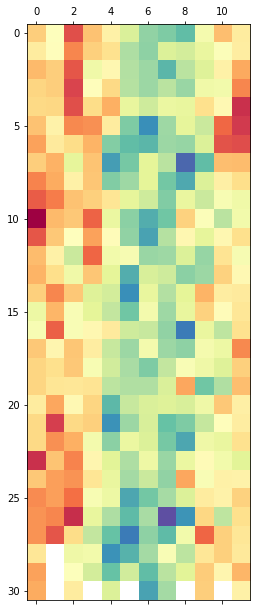

In [21]:
# Draw a heatmap comparing the months of the year in 1990 
plt.matshow(months_df, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

The plot shows the same macro trend seen for each year on the zoomed level of month-to-month. We can also see some white patches at the bottom of the plot. This is missing data for those months that have fewer than 31 days, with February being quite an outlier with 28 days in 1990.

## Summary 

In this lab, you learned how to explore and better understand a time-series dataset using Pandas. You also learned how to explore the temporal relationships with line, scatter, box and whisper plots, histograms, density plots, and heat maps. 